# Epoch Extraction for date/timestamp (follow up of #2149)

In [1]:
# t.timestamp_of_birth - ibis.interval(1, 'D')
# Error: Unknown HTML element <int8> on line 1 
# in label of node 7208238078510608626

In [2]:
from datetime import datetime, date

import ibis
import numpy as np
import pandas as pd
# local
from settings import conf
from utils import cursor2df
from gen_data import salary_date, salary_date_schema

ibis.options.interactive = False

### Setup

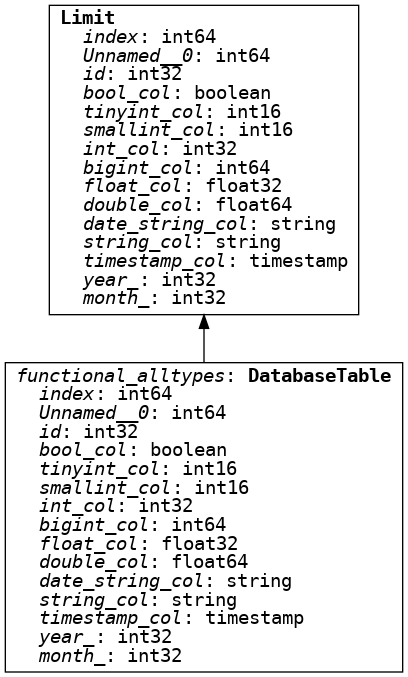

In [3]:
BACKENDS = ['omniscidb']  # , 'postgres'
con = {
    backend: getattr(ibis, backend).connect(**conf[backend]) 
    for backend in BACKENDS
}

con['omniscidb'].table('functional_alltypes').head()

In [4]:
df_salary1 = salary_date()
print(df_salary1.dtypes)
df_salary1.info()

last_name                     object
salary                       float64
date_of_birth                 object
timestamp_of_birth    datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   last_name           4018 non-null   object        
 1   salary              4018 non-null   float64       
 2   date_of_birth       4018 non-null   object        
 3   timestamp_of_birth  4018 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 125.7+ KB


In [5]:
sch = salary_date_schema()
sch

ibis.Schema {  
  last_name           string
  salary              float64
  date_of_birth       date
  timestamp_of_birth  timestamp
}

In [6]:
table_name = 'salary_epoch'
t = {}
params = {
    'omniscidb': {},
    'postgres': {'if_exists': 'append'}
}

for backend in BACKENDS:
    if hasattr(con[backend], 'load_data'):
        con[backend].drop_table(table_name, force=True)
        con[backend].create_table(table_name, schema=sch)
        con[backend].load_data(table_name, df_salary1, **params[backend])
    t[backend] = con[backend].table(table_name)

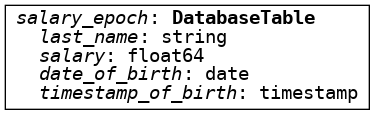

In [7]:
con['omniscidb'].table(table_name)

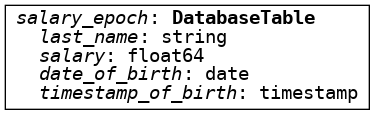

In [8]:
t['omniscidb']

In [9]:
t['omniscidb'].execute().head()

,last_name,salary,date_of_birth,timestamp_of_birth
0,Name 2010 1 1,2010011.0,2010-01-01,2010-01-01 01:01:01
1,Name 2011 1 1,2011011.0,2011-01-01,2011-01-01 01:01:01
2,Name 2012 1 1,2012011.0,2012-01-01,2012-01-01 01:01:01
3,Name 2013 1 1,2013011.0,2013-01-01,2013-01-01 01:01:01
4,Name 2014 1 1,2014011.0,2014-01-01,2014-01-01 01:01:01


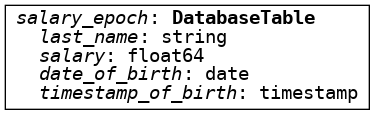

In [12]:
t['omniscidb']